# Pandas and Matplotlib Homework

In [1]:
# load the libraries using the normal convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# prevent plotting errors
%matplotlib inline

/anaconda3/envs/itp_2018/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/itp_2018/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Load our excel files of interest into pandas
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
GAA_ = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname='5vs5')

/anaconda3/envs/itp_2018/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


#Appendix:
 1. DF = Pandas DataFrame
 2. NHL_Goalies DF = NHL_Goalies 
 3. GAA_ DF = GAA_

### Q1A) Create a new DF (*called NHL_Ones*) by:
#### Filtering the correct DF for Goalies that played 1 game <font color='red'> (GP = Games played)</font>

Notes: How would you find the 'GP' column in these files? Review from Pandas Lecture

In [3]:
# Answer 1A:

# find GP column in df, defining it as a variable here to use in next step
GP = NHL_Goalies.GP

# create new df, list players only when GP is equal to 1
NHL_Ones = NHL_Goalies[GP == 1]

# NHL_Ones
# NHL_Ones.GP


 ## Q1B) 
 #### A. Find the value of the minimum Salary for the entire dataset 
 #### B. Replace the missing values from the NHL_Ones DF with this
 #### C. Create a new DF after replacement by **adding** a column called  "Adjusted_Salary"
 #### D. I would like to only see the old "Salary" column and the "Adjusted Salary" column from the new Dataframe

#### Notes:
1. Note where the minimum Salary value is coming & where you are going to assign it to
2. Review notes from pandas **replacement**
3. Look up Numpy definition for null
4. Look up Pandas **Series** Naming 
5. Review concat function in Pandas
6. Review how to slice columns

In [4]:
# Answer 1B:
# A. Find the value of the minimum Salary for the entire dataset

Minimum_Salary = NHL_Goalies.Salary.min()

print('Minimum Salary: $',Minimum_Salary)



Minimum Salary: $ 575000.0


In [5]:
# Answer 1B:
# B. Replace the missing values from the NHL_Ones DF with this

NHL_Ones = NHL_Ones.replace('NaN', np.nan)
Adjusted_Salaries = NHL_Ones.Salary.replace(np.nan, Minimum_Salary)


print('Adjusted Salaries','\n', Adjusted_Salaries)


Adjusted Salaries 
 1     575000.0
13    575000.0
14    575000.0
16    708750.0
22    780000.0
27    650000.0
29    925000.0
32    575000.0
42    575000.0
50    673334.0
67    575000.0
80    575000.0
87    832500.0
89    575000.0
90    892500.0
Name: Salary, dtype: float64


In [6]:
# Answer 1B: 
# C. Create a new DF after replacement by adding a column called "Adjusted_Salary"

NHL_Ones['Adjusted_Salary'] = Adjusted_Salaries

# NHL_Ones

In [7]:
# Answer 1B: 
# D. I would like to only see the old "Salary" column and the "Adjusted Salary" column from the new Dataframe

Salary_vs_Adjusted_Salary = pd.concat([NHL_Ones.Salary, NHL_Ones.Adjusted_Salary], axis=1)
Salary_vs_Adjusted_Salary 


,Salary,Adjusted_Salary
1,NaN,575000.0
13,NaN,575000.0
14,575000.0,575000.0
16,708750.0,708750.0
22,780000.0,780000.0
27,650000.0,650000.0
29,925000.0,925000.0
32,NaN,575000.0
42,575000.0,575000.0
50,673334.0,673334.0


### Q2) A. Subset the NHL goalies data to include Goalies that played in more than 25 games AND have a GAA lower than 3.00 and store the New DF as 'workhorse'


Notes: 
1. Review notes from Pandas Lecture on creating masks
2. Internet search for Multiple Boolean indexing on multiple columns in a Pandas DataFrame

In [8]:
# Answer 2:

GP = NHL_Goalies.GP
GAA = NHL_Goalies.GAA

Workhorse = NHL_Goalies[(GP > 25) & (GAA < 3.00)] 
 
# Workhorse
Workhorse_GP_GAA = pd.concat([Workhorse.GP, Workhorse.GAA], axis=1)
Workhorse_GP_GAA

,GP,GAA
0,61,2.422245
2,66,2.668889
3,40,2.279830
5,39,2.498516
9,39,2.537550
10,63,2.055534
12,60,2.176366
15,41,2.478041
18,55,2.550151
19,32,2.380694


### Q3. Create 2 python functions that: 
<br> </br>
#### A. Creates/*Returns* a new DataFrame that displays the number of missing values in every column. 
#### This new DataFrame has one new column named "Missing" with the sum of the missing values from the columns

### Notes 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
** One Proposed method:**
1. Create a pandas series object from the sum of the nulls in every column (review class notes)
2. Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index. (read Pandas Help online)
3. During the conversion of the series object to a DataFrame pass a columns argument to create a name for the new Output DataFrame's Column.

### Expected Output:
<img src='Missing_cols_expectedoutput.png'>

In [9]:
# Answer 3A: 
# 1. Create a pandas series object from the sum of the nulls in every column (review class notes)
# 2. Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index. (read Pandas Help online)
# 3. During the conversion of the series object to a DataFrame pass a columns argument to create a name for the new Output DataFrame's Column.


def Missing_Cols(df):
    na_sum_series = pd.Series(df.isnull().sum()) # new pd series: sum of nulls in each column
    Missing_Cols = pd.DataFrame(na_sum_series, columns = ['Missing']) # convert series into df, new col named Missing
    return Missing_Cols # return final df

Missing_Cols(NHL_Goalies)



,Missing
Last Name,0
First Name,0
Team,0
DOB,0
Birth City,0
S/P,34
Cntry,0
Nat,0
Ht,0
Wt,0


#### B. Creates a new *column* called 'missing_values' in the input DF that sums the missing values in each row.

### Notes: 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
Review the Column creation method in lecture and the axis arguments needed

### Expected Output:
<img src= 'missingrows_expectedoutput.png'>

In [11]:
# Answer 3B here:
def Missing_Values(df):
    na_sum_series = pd.Series(df.isnull().sum(axis = 1)) # new pd series: sum of nulls in each row
    na_sum_series = pd.DataFrame(na_sum_series, columns = ['Missing_Values']) # convert series into df, new col named Missing_Values
    Missing_Values = pd.concat([df, na_sum_series], axis=1) # concatenate old df with new one
    return Missing_Values # return final df

Missing_Values(NHL_Goalies)

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP,Missing_Values
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,,3
1,Alves,Jorge,CAR,1979-01-30,Boston,MA,USA,USA,69,185,...,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,,18
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951,2
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439,1
4,Bachman,Richard,VAN,1987-07-25,Salt Lake City,UT,USA,USA,70,183,...,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,,3
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829,1
6,Berra,Reto,FLA,1987-01-03,Bulach,NaN,CHE,CHE,76,210,...,108.457976,NaN,NaN,NaN,NaN,0.2,NaN,NaN,,8
7,Berube,Jean-Francois,NYI,1991-07-13,Repentigny,QC,CAN,CAN,73,177,...,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,,3
8,Bibeau,Antoine,TOR,1994-05-01,Victoriaville,QC,CAN,CAN,75,210,...,130.294240,NaN,NaN,NaN,NaN,0.4,NaN,NaN,,7
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049,0


### Q4) Matplotlib Question Plot in one figure and 2 side by side plots:
<br> </br>
#### A. Plot the histogram of the all the GAA of the NHL_Goalies DF  AND the goalies that played in more than 25 games with a GAA < 3.00, 
#### B. Label the Titles of the plots differently (*ie EntireSet + Subset*)
#### C. Change the color of one of the plots from the default

# Notes

1. convert your column of interest into a NumPY array (look up online for usage)
2. Review: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html

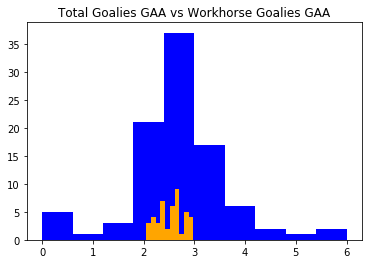

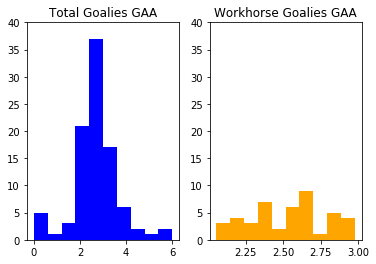

In [27]:
# Answer 4 here:
# A. Plot the histogram of the all the GAA of the NHL_Goalies DF AND the goalies that played in more than 25 games with a GAA < 3.00
# B. Label the Titles of the plots differently (ie EntireSet + Subset)
# C. Change the color of one of the plots from the default

# NHL_Goalies = all goalies
# Workhorse_GP_GAA = goalies who played in > 25 games and GAA < 3

Total_Goalies_GAA = NHL_Goalies.GAA.values # turn total goalies GAA column into np array
Workhorse_GAA = Workhorse_GP_GAA.GAA.values # turn workhorse GAA column into np array

plt.hist(Total_Goalies_GAA, color = 'blue') # plot histogram, entire set, set color to blue
plt.hist(Workhorse_GAA, color = 'orange') # plot histogram, workhorse subset, set color to orange
plt.title('Total Goalies GAA vs Workhorse Goalies GAA') # set title 
plt.show() # plot one plot with both arrays

plt.subplot(1,2,1) # set subplots to two, set boundaries for first one
plt.hist(Total_Goalies_GAA, color = 'blue') # plot histogram, entire set, set color to blue
plt.ylim(ymax = 40) # set y max to 40
plt.title('Total Goalies GAA') # set title 

plt.subplot(1,2,2) # set boundaries for second subplot
plt.hist(Workhorse_GAA, color = 'orange') # plot histogram, workhorse subset, set color to orange 
plt.ylim(ymax = 40) # set y max to 40
plt.title('Workhorse Goalies GAA') # set title 

plt.show() # plot both plots


### Q5) GroupBy Question
##### 1. Subset the NHL_Goalies DataFrame where Injuries is not known <font color='red'>(Injuries=NaN)</font>; 
##### 2. Use a Merge with the GAA_  DF to produce a NEW DF (*called mergedDF*) 
###### *** USE A JOIN THAT PRESERVES ORDER AND USES THE INTERSECTION OF KEYS***
###### *** USE BOTH THE LEFT AND RIGHT INDEXES AS JOIN KEYS***
##### 3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
##### 4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
#### 5. Create a dataframe of the <font color='red'>TOI </font>groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

## Notes:

1. Review how to create selection criteria and how aggs/joins work from lecture notes;
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
3. https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key
4. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.get.html

In [ ]:
#Answer 5 here: please comments


# Q6) Write a function(s)  
## that subsets a dataframe by removing rows that are WITHIN the InterQuartile Region of a specified column
<br> </br>
### The function takes as input 
##### A: Pandas_Dataframe (For example use NHL_GoaliesDF)
##### B. Column name
### Add a condition that returns an error if the Column Name chosen is not:
##### A. Numeric Dtype
##### B. Does not exist in the Numeric Columns
### The output is a DataFrame that removes rows outside of the specified columns IQR
<br> </br>
<font color='red'>**You can use smaller helper functions **<font>
<br> </br>
See --> <href>=https://en.wikipedia.org/wiki/Interquartile_range</href>
#hint: There are several pandas subfunctions that can be useful

In [ ]:
#Answer Question 6 here

***For any questions regarding this assignment please email SAMSON: <br> </br><font color='green'>sjacob210@gmail.com ***</font>